BLACK FIDAY DATASET :
CLEANING AND PREPARING FOR MODEL TRAINING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\Welcome\Downloads\blackfriday\train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
#for the statistical analysis:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000



A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.






#we have to merge both  the dataset which are train and test dataset

In [6]:
test=pd.read_csv(r"C:\Users\Welcome\Downloads\blackfriday\test.csv")

In [7]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
final=pd.concat([df,test],ignore_index=True,join="inner")

In [9]:
final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [10]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 65.8+ MB


In [11]:
final.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000


total 11 columns which has 5 objects and 7 of them are numerical

In [12]:
final.drop(['User_ID'],axis=1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [13]:
final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


To even remove it permanently we should use inplce which automatically updates the value 

In [14]:
final.drop(['User_ID'],axis=1,inplace=True)

In [15]:
final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


now we should convert gender variable into some of the numerical variable 

In [16]:
final['Gender']=final['Gender'].map({'F':1,'M':0})

In [17]:
final

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,1,26-35,15,B,4+,1,8,NaN,NaN
783663,P00254642,1,26-35,15,B,4+,1,5,8.0,NaN
783664,P00031842,1,26-35,15,B,4+,1,1,5.0,12.0
783665,P00124742,1,46-50,1,C,4+,0,10,16.0,NaN


In [18]:
#we can also use get_dummies

lets convert some other categirical features into numerical features

In [19]:
final['Age']=final['Age'].map({'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7})

In [20]:
final['Age'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [21]:
final.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,1,1,10,A,2,0,3,NaN,NaN
1,P00248942,1,1,10,A,2,0,1,6.0,14.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN
3,P00085442,1,1,10,A,2,0,12,14.0,NaN
4,P00285442,0,2,16,C,4+,0,8,NaN,NaN


In [22]:
final['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [23]:
cities=pd.get_dummies(final['City_Category'],dtype="int64",drop_first=True)
cities

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [24]:
final=pd.concat([cities.reset_index(drop=True),final.reset_index(drop=True)],axis=1)

In [25]:
final

,B,C,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,P00069042,1,1,10,A,2,0,3,NaN,NaN
1,0,0,P00248942,1,1,10,A,2,0,1,6.0,14.0
2,0,0,P00087842,1,1,10,A,2,0,12,NaN,NaN
3,0,0,P00085442,1,1,10,A,2,0,12,14.0,NaN
4,0,1,P00285442,0,2,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1,0,P00118942,1,3,15,B,4+,1,8,NaN,NaN
783663,1,0,P00254642,1,3,15,B,4+,1,5,8.0,NaN
783664,1,0,P00031842,1,3,15,B,4+,1,1,5.0,12.0
783665,0,1,P00124742,1,4,1,C,4+,0,10,16.0,NaN


In [26]:
final.drop('City_Category',axis=1,inplace=True)

In [27]:
final

,B,C,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,P00069042,1,1,10,2,0,3,NaN,NaN
1,0,0,P00248942,1,1,10,2,0,1,6.0,14.0
2,0,0,P00087842,1,1,10,2,0,12,NaN,NaN
3,0,0,P00085442,1,1,10,2,0,12,14.0,NaN
4,0,1,P00285442,0,2,16,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
783662,1,0,P00118942,1,3,15,4+,1,8,NaN,NaN
783663,1,0,P00254642,1,3,15,4+,1,5,8.0,NaN
783664,1,0,P00031842,1,3,15,4+,1,1,5.0,12.0
783665,0,1,P00124742,1,4,1,4+,0,10,16.0,NaN


lets talk about null values an try to replace them

In [28]:
final.isnull().sum()

B                                  0
C                                  0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
dtype: int64

In [29]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [30]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

Replacing all the missing values with mode

In [31]:
final['Product_Category_2'].mode()[0]

np.float64(8.0)

In [32]:
final['Product_Category_2']=final['Product_Category_2'].fillna(final['Product_Category_2'].mode()[0])

In [33]:
final['Product_Category_2'].isnull().sum()

np.int64(0)

In [34]:
final['Product_Category_3'].isnull()

0          True
1         False
2          True
3          True
4          True
          ...  
783662     True
783663     True
783664    False
783665     True
783666     True
Name: Product_Category_3, Length: 783667, dtype: bool

In [35]:
final['Product_Category_3']=final['Product_Category_3'].fillna(final['Product_Category_3'].mode()[0])

In [36]:
final['Product_Category_3'].isnull().sum()

np.int64(0)

In [37]:
final

,B,C,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,P00069042,1,1,10,2,0,3,8.0,16.0
1,0,0,P00248942,1,1,10,2,0,1,6.0,14.0
2,0,0,P00087842,1,1,10,2,0,12,8.0,16.0
3,0,0,P00085442,1,1,10,2,0,12,14.0,16.0
4,0,1,P00285442,0,2,16,4+,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,1,0,P00118942,1,3,15,4+,1,8,8.0,16.0
783663,1,0,P00254642,1,3,15,4+,1,5,8.0,16.0
783664,1,0,P00031842,1,3,15,4+,1,1,5.0,12.0
783665,0,1,P00124742,1,4,1,4+,0,10,16.0,16.0


this is ot the right way because it make us lose all thedata except 4 or 4+ so mapping we cannot do

#final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].map({'4+':'4'})

In [38]:
#final['Stay_In_Current_City_Years']

In [39]:
final['Stay_In_Current_City_Years'].str.replace('+','')

0         2
1         2
2         2
3         2
4         4
         ..
783662    4
783663    4
783664    4
783665    4
783666    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [40]:
final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].map({1:1,2:2,3:3,4:4,0:0})

In [41]:
final['Stay_In_Current_City_Years']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
783662   NaN
783663   NaN
783664   NaN
783665   NaN
783666   NaN
Name: Stay_In_Current_City_Years, Length: 783667, dtype: float64

In [42]:
final.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [43]:
final

,B,C,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,P00069042,1,1,10,0,3,8.0,16.0
1,0,0,P00248942,1,1,10,0,1,6.0,14.0
2,0,0,P00087842,1,1,10,0,12,8.0,16.0
3,0,0,P00085442,1,1,10,0,12,14.0,16.0
4,0,1,P00285442,0,2,16,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...
783662,1,0,P00118942,1,3,15,1,8,8.0,16.0
783663,1,0,P00254642,1,3,15,1,5,8.0,16.0
783664,1,0,P00031842,1,3,15,1,1,5.0,12.0
783665,0,1,P00124742,1,4,1,0,10,16.0,16.0


Lets talk about some visualization representing final datasets

In [44]:
final.corr(numeric_only=True)

,B,C,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
B,1.000000,-0.572552,0.005399,0.039722,-0.011721,-0.002804,-0.003863,-0.003944,0.004291
C,-0.572552,1.000000,0.000180,-0.013213,0.035255,0.034377,-0.012870,-0.000443,-0.020687
Gender,0.005399,0.000180,1.000000,0.001278,-0.116505,0.010945,0.046208,0.011851,0.006651
Age,0.039722,-0.013213,0.001278,1.000000,-0.041506,-0.079586,-0.012859,-0.007581,-0.006785
Occupation,-0.011721,0.035255,-0.116505,-0.041506,1.000000,0.023563,-0.008441,0.001501,-0.001576
Marital_Status,-0.002804,0.034377,0.010945,-0.079586,0.023563,1.000000,0.019579,0.012192,0.013808
Product_Category_1,-0.003863,-0.012870,0.046208,-0.012859,-0.008441,0.019579,1.000000,0.286502,0.319209
Product_Category_2,-0.003944,-0.000443,0.011851,-0.007581,0.001501,0.012192,0.286502,1.000000,0.463528
Product_Category_3,0.004291,-0.020687,0.006651,-0.006785,-0.001576,0.013808,0.319209,0.463528,1.000000


<Axes: >

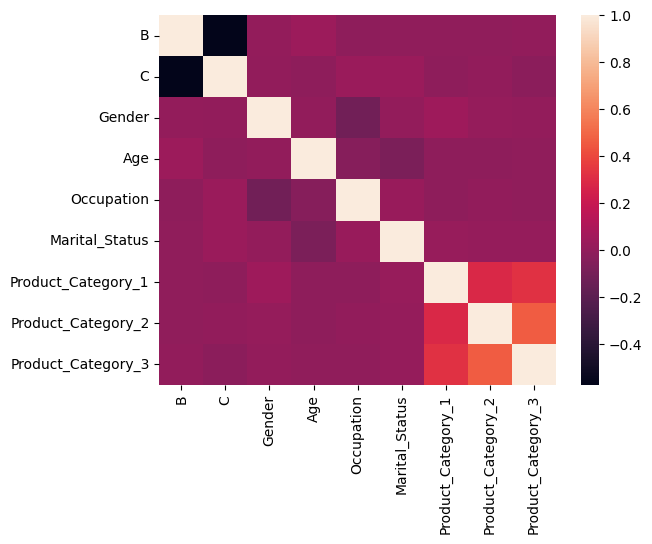

In [45]:
sns.heatmap(final.corr(numeric_only=True))

<Axes: xlabel='Age', ylabel='count'>

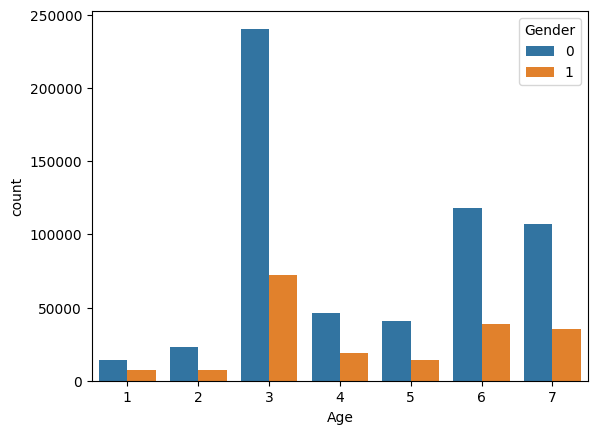

In [52]:
sns.countplot(data=final,x='Age',hue='Gender')

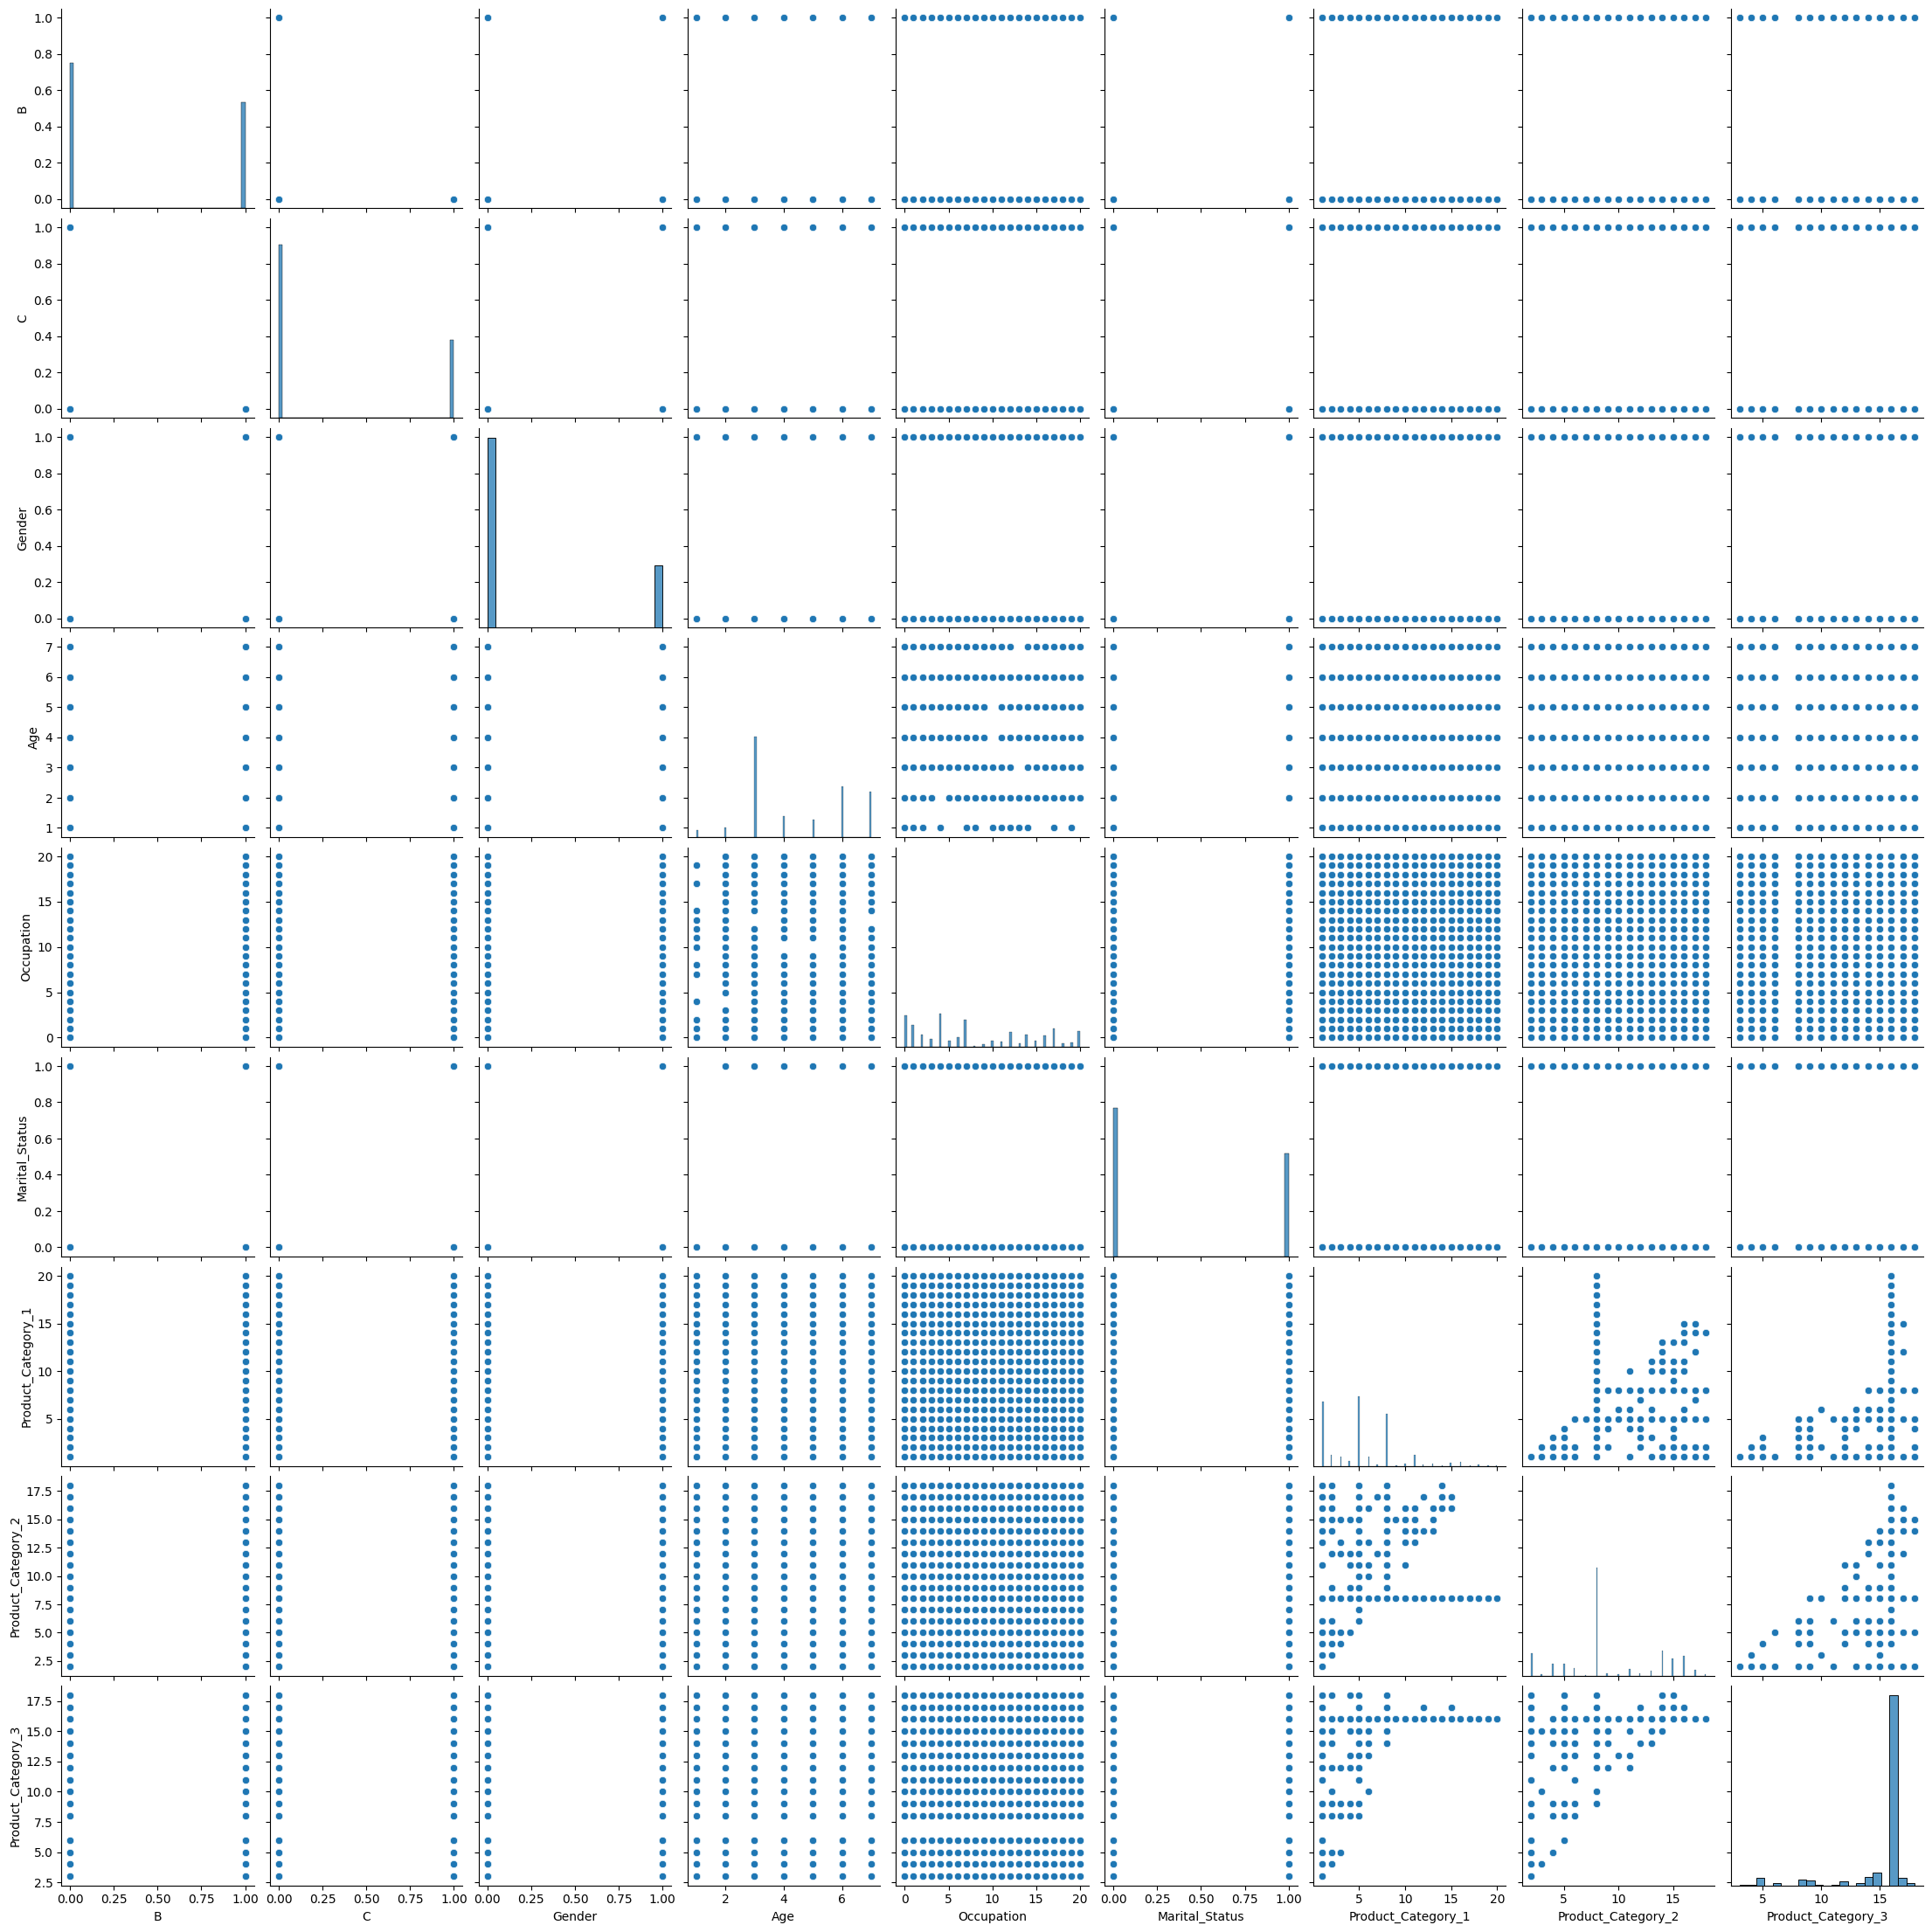

In [53]:
sns